In [13]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 


temp_june = session.query(Measurement.tobs, Measurement.date).filter(extract('month', Measurement.date) == 6) 




In [5]:
#  3. Convert the June temperatures to a list.

temp_june_ls = temp_june.all()
temp_june_ls

[(78.0, '2010-06-01'),
 (76.0, '2010-06-02'),
 (78.0, '2010-06-03'),
 (76.0, '2010-06-04'),
 (77.0, '2010-06-05'),
 (78.0, '2010-06-06'),
 (77.0, '2010-06-07'),
 (78.0, '2010-06-08'),
 (78.0, '2010-06-09'),
 (79.0, '2010-06-10'),
 (78.0, '2010-06-11'),
 (78.0, '2010-06-12'),
 (78.0, '2010-06-13'),
 (77.0, '2010-06-14'),
 (78.0, '2010-06-15'),
 (78.0, '2010-06-16'),
 (77.0, '2010-06-17'),
 (77.0, '2010-06-18'),
 (82.0, '2010-06-19'),
 (78.0, '2010-06-20'),
 (78.0, '2010-06-21'),
 (78.0, '2010-06-22'),
 (78.0, '2010-06-23'),
 (78.0, '2010-06-24'),
 (77.0, '2010-06-25'),
 (76.0, '2010-06-26'),
 (78.0, '2010-06-27'),
 (78.0, '2010-06-28'),
 (78.0, '2010-06-29'),
 (78.0, '2010-06-30'),
 (77.0, '2011-06-01'),
 (78.0, '2011-06-02'),
 (73.0, '2011-06-03'),
 (70.0, '2011-06-04'),
 (76.0, '2011-06-05'),
 (77.0, '2011-06-06'),
 (77.0, '2011-06-07'),
 (77.0, '2011-06-08'),
 (77.0, '2011-06-09'),
 (78.0, '2011-06-10'),
 (77.0, '2011-06-11'),
 (77.0, '2011-06-12'),
 (78.0, '2011-06-13'),
 (78.0, '20

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

temp_jun_df = pd.DataFrame(temp_june_ls, columns = ['June Temps', 'Date'])

temp_jun_df.head()

,June Temps,Date
0,78.0,2010-06-01
1,76.0,2010-06-02
2,78.0,2010-06-03
3,76.0,2010-06-04
4,77.0,2010-06-05


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.

temp_jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

temp_dec = session.query(Measurement.tobs, Measurement.date).filter(extract('month', Measurement.date) == 12) 

In [9]:
# 7. Convert the December temperatures to a list.
temp_dec_ls = temp_dec.all()


In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temp_dec_df = pd.DataFrame(temp_dec_ls, columns = ['Dec Temps', 'Date'])

temp_dec_df

,Dec Temps,Date
0,76.0,2010-12-01
1,74.0,2010-12-03
2,74.0,2010-12-04
3,64.0,2010-12-06
4,64.0,2010-12-07
...,...,...
1512,71.0,2016-12-27
1513,71.0,2016-12-28
1514,69.0,2016-12-29
1515,65.0,2016-12-30


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.

temp_dec_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


(0.0, 2.5)

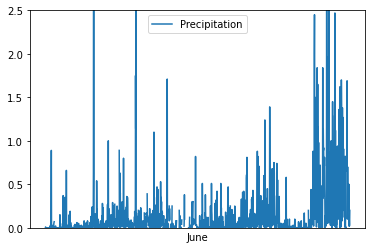

In [50]:
#Plot precipitation between June and December


prcp_june = session.query(Measurement.prcp, Measurement.date).filter(extract('month', Measurement.date) == 6) 

prcp_june_ls = prcp_june.all()

prcp_june_df = pd.DataFrame(prcp_june_ls, columns = ['Precipitation','Date'])

prcp_june_df.set_index(prcp_june_df['Date'], inplace=True)

prcp_june_df.plot()


plt.xlabel('June')

plt.xticks([])

plt.ylim(0,2.5)

(0.0, 2.5)

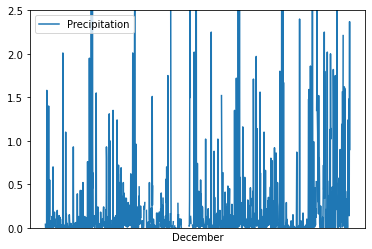

In [51]:
prcp_dec = session.query(Measurement.prcp, Measurement.date).filter(extract('month', Measurement.date) == 12) 

prcp_dec_ls = prcp_dec.all()

prcp_dec_df = pd.DataFrame(prcp_dec_ls, columns = ['Precipitation','Date'])

prcp_dec_df.set_index(prcp_dec_df['Date'], inplace=True)

prcp_dec_df.plot()

plt.xlabel('December')

plt.xticks([])

plt.ylim(0,2.5)

In [52]:
prcp_dec_df['Precipitation December'] = prcp_dec_df['Precipitation']
prcp_june_df['Precipitation June'] = prcp_june_df['Precipitation']

prcp_dec_df.drop('Precipitation', axis=1, inplace=True)
prcp_june_df.drop('Precipitation', axis=1, inplace=True)

prcp_dec_df.describe()

,Precipitation December
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [53]:
prcp_june_df.describe()

,Precipitation June
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


Text(0.5, 0, 'June')

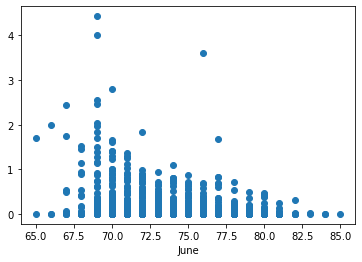

In [55]:
#Precipitation vs temperature for the month of June

prcp_temp_june = session.query(Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date) == 6) 

prcp_temp_june_ls = prcp_temp_june.all()

prcp_temp_june_df = pd.DataFrame(prcp_temp_june_ls, columns = ['Precipitation','Temperature'])

prcp_temp_june_df.set_index(prcp_temp_june_df['Temperature'], inplace=True)

plt.scatter(prcp_temp_june_df['Temperature'],prcp_temp_june_df['Precipitation'])

plt.xlabel('June')


Text(0.5, 0, 'December')

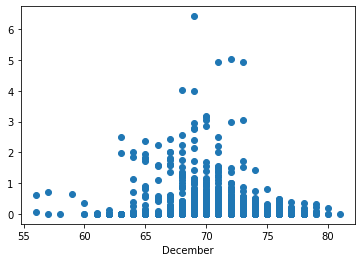

In [56]:
#Precipitation vs temperature for the month of December

prcp_temp_dec = session.query(Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date) == 12) 

prcp_temp_dec_ls = prcp_temp_dec.all()

prcp_temp_dec_df = pd.DataFrame(prcp_temp_dec_ls, columns = ['Precipitation','Temperature'])

prcp_temp_dec_df.set_index(prcp_temp_dec_df['Temperature'], inplace=True)

plt.scatter(prcp_temp_dec_df['Temperature'],prcp_temp_dec_df['Precipitation'])

plt.xlabel('December')

In [43]:
#Attribute

first = session.query(Measurement).first()

first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fcb28984250>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [44]:
station_att = session.query(Station).first()

station_att.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fcb1b0e8710>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'elevation': 3.0,
 'station': 'USC00519397',
 'longitude': -157.8168}